In [9]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import random
from scipy import stats, spatial
import pickle
from matplotlib import rc
# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
# rc('text', usetex=True)
import csv
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.colorbar import colorbar

from statsmodels.formula.api import ols
import statsmodels.api as sm

In [2]:
tfidf_path = '../../data/tfidf_merged_chs_20210915_no_crossover/'

In [3]:
lda_path = '../../data/lda_merged_chs_20210915_no_crossover/'

In [4]:
fandom_list = [
 'harry_potter',
 'dcu',
 'doctor_who_&_related_fandoms',
 'star_wars_all_media_types',
 'arthurian_mythology_&_related_fandoms',
 'supernatural',
 'haikyuu',
 'kuroko_no_basuke',
 'hamilton_miranda',
 'dragon_age_all_media_types',
 'the_walking_dead_&_related_fandoms',
 'buffy_the_vampire_slayer',
 'naruto',
 'tolkien_j_r_r_works_&_related_fandoms',
 'shakespare_william_works',
 'hetalia_axis_powers',
 'attack_on_titan',
 'ms_paint_adventures',
 'marvel',
 'bishoujo_senshi_sailor_moon',
 'one_direction',
 'sherlock_holmes_&_related_fandoms'
]

In [5]:
fandom_list

['harry_potter',
 'dcu',
 'doctor_who_&_related_fandoms',
 'star_wars_all_media_types',
 'arthurian_mythology_&_related_fandoms',
 'supernatural',
 'haikyuu',
 'kuroko_no_basuke',
 'hamilton_miranda',
 'dragon_age_all_media_types',
 'the_walking_dead_&_related_fandoms',
 'buffy_the_vampire_slayer',
 'naruto',
 'tolkien_j_r_r_works_&_related_fandoms',
 'shakespare_william_works',
 'hetalia_axis_powers',
 'attack_on_titan',
 'ms_paint_adventures',
 'marvel',
 'bishoujo_senshi_sailor_moon',
 'one_direction',
 'sherlock_holmes_&_related_fandoms']

In [6]:
# df = pd.read_csv(os.path.join(lda_path,'sherlock_holmes_&_related_fandoms_temporal_lda_jsd_toprev_with_dist_merged_chs_no_text.tsv'), sep = '\t')

In [7]:
# len(df)

In [8]:
def normalize_dfs(df):
    
    # normalization of the success field
    df = df.replace([np.inf, -np.inf], np.nan)
    df['Hits'].fillna(0, inplace=True)
    df['Kudos'].fillna(0, inplace=True)
    df['Bookmarks'].fillna(0, inplace=True)
    df['Comments'].fillna(0, inplace=True)

    # normalize by chapter number
    df['Kudos'] = df['Kudos']/df['Chapters'] 
    df = df.replace([np.inf, -np.inf], np.nan)
    df['Kudos'].dropna()

    df['Hits'].dropna()

    df['Bookmarks'].dropna()
    return df

In [19]:
coef_kudos = []
coef_ratio = []
for fandom in fandom_list:
    df = pd.read_csv(os.path.join(tfidf_path, fandom + \
                              '_temporal_tfidf_cos_merged_chapters_no_crossover_no_sample_20210915.tsv'), sep = '\t')

    df = normalize_dfs(df)
    df = df[df.Hits >= 10]
    df['kudos_hit_ratio'] = df['Kudos']/df['Hits']  

    df = df.replace([np.inf, -np.inf], np.nan)
    df = df[['Cos', 'Kudos', 'kudos_hit_ratio']].dropna()
    
    model_kudos = ols( 'Kudos ~ Cos', data = df).fit()
    coef_kudos.append(model_kudos.params[1])
    
    model_ratio = ols( 'kudos_hit_ratio ~ Cos', data = df).fit()
    coef_ratio.append(model_ratio.params[1])
    


In [20]:
coef_ratio

[0.012920526092184702,
 0.01709397720441167,
 -0.005986847621230688,
 0.00401095920847256,
 -0.0030955888369591047,
 7.257581305984608e-05,
 0.011699898004334332,
 0.0076183516745907,
 0.013546441368959316,
 0.020578174804444686,
 0.019001395842849055,
 0.006992970868971226,
 0.018242442088999975,
 0.03243545568028609,
 0.005168509156386194,
 0.01543532720505866,
 0.007404758781091248,
 0.01003399920365768,
 0.009385394054733225,
 0.012883672681828762,
 -0.01426148499922785,
 0.014932814190190569]

In [21]:
coef_kudos

[-80.35968085953571,
 -79.05204306648547,
 -34.63537825145505,
 -83.28566225270812,
 -227.40414904340065,
 -75.47717270265107,
 -57.99287940039359,
 -46.15434370924313,
 -3.6431906452046423,
 -1.6405983569325713,
 -48.50499867183359,
 -9.295587574596091,
 -67.67594202919014,
 -114.72494122976956,
 8.786778231372459,
 -9.362648844383255,
 -66.66688925954756,
 -26.270604007722305,
 -81.23460352816998,
 -9.94995283156207,
 -223.82940227070574,
 -139.62489611307728]

Text(0.5, 1.0, 'Term novelty')

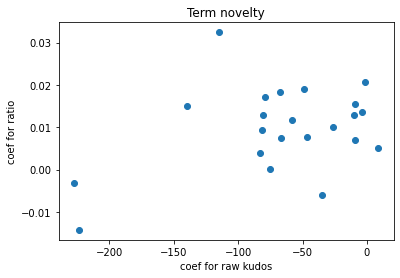

In [23]:
plt.scatter(coef_kudos, coef_ratio)
plt.xlabel('coef for raw kudos')
plt.ylabel('coef for ratio')
plt.title('Term novelty')

In [24]:
coef_kudos = []
coef_ratio = []
for fandom in fandom_list:
    df = pd.read_csv(os.path.join(lda_path, fandom + \
                               '_lda_with_dist_merged_chs_no_crossover_20210915.tsv'), sep = '\t')

    df = normalize_dfs(df)
    df = df[df.Hits >= 10]
    df['kudos_hit_ratio'] = df['Kudos']/df['Hits']  

    df = df.replace([np.inf, -np.inf], np.nan)
    df = df[['JSD', 'Kudos', 'kudos_hit_ratio']].dropna()
    
    model_kudos = ols( 'Kudos ~ JSD', data = df).fit()
    coef_kudos.append(model_kudos.params[1])
    
    model_ratio = ols( 'kudos_hit_ratio ~ JSD', data = df).fit()
    coef_ratio.append(model_ratio.params[1])
    


Text(0.5, 1.0, 'Topic novelty')

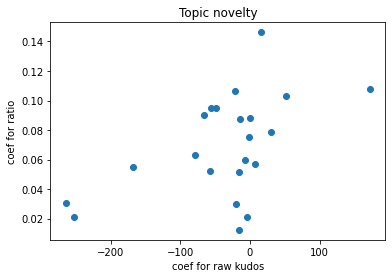

In [25]:
plt.scatter(coef_kudos, coef_ratio)
plt.xlabel('coef for raw kudos')
plt.ylabel('coef for ratio')
plt.title('Topic novelty')